In [90]:
using PyPlot

$\newcommand{\vec}{\mathbf}$
* The Metropolis algorithm (symmetric proposal distribution) allows us to sample from a distribution $p(\vec x)$ where $\vec x$ is a n-dimensional vector
* It is sufficient to know a function $f(\vec x)$ which is proportional to the pdf $p(\vec x)$

$$
f(x) = a \, p(x)
$$

* On could determine the value of $a$, since $\int_ℝ f(\vec x) \, d\vec x = a$, but in high dimensional spaces, this integral can be intractable  


* Assume that we have two dimensional variables
* And we want to sample from a Gaussian distribution

In [91]:
n = 2;

f(x) = exp(- (x' * x))

f (generic function with 1 method)

Let's plot lines of constant propability

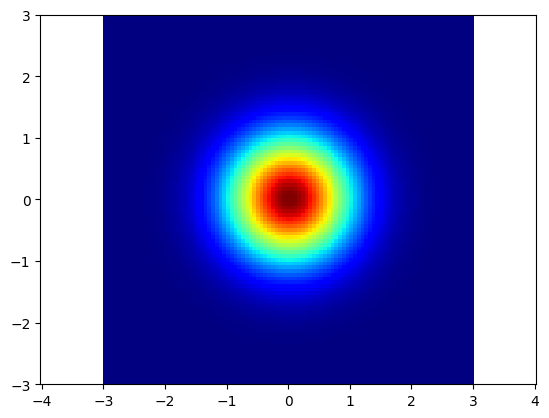

(-3.0:0.06060606060606061:3.0, -3.0:0.06060606060606061:3.0, [1.523e-8 2.18288e-8 … 2.18288e-8 1.523e-8; 2.18288e-8 3.12867e-8 … 3.12867e-8 2.18288e-8; … ; 2.18288e-8 3.12867e-8 … 3.12867e-8 2.18288e-8; 1.523e-8 2.18288e-8 … 2.18288e-8 1.523e-8])

In [115]:
function plotF(f, Fx = linspace(-3,3,100), Fy = linspace(-3,3,100))
    F = zeros(length(Fx),length(Fy))
    for j = 1:length(Fy)
       for i = 1:length(Fx)
            F[i,j] = f([Fx[i]; Fy[j]]) 
        end
    end
    pcolor(Fx,Fy,F')
    axis("equal")
    return Fx,Fy,F
end

Fx,Fy,F = plotF(f)

## The Metropolis algorithm

1. Pick a starting point $\vec x_0$
2. Choose the next point by sampling from $g(\vec  x' | \vec x_i)$
3. Compute the acceptance ratio
$$
α = \frac{f(\vec x')}{f(\vec x_i)}
$$
4. Generate a random number $u$ from the uniform distribution [0,1]
5. if  $u \le α$ is accept the candidate: $\vec x_{i+1}$ = $\vec x'$
   Otherwise  $\vec x_{i+1}$ = $\vec x_{i}$

Note:

* $g(\vec  x | \vec y)$ represent the probability to go from $\vec y$ to $\vec x$.
* The the Metropolis algorithm, it is required $g(\vec  x | \vec y) = g(\vec  y | \vec x)$
* A common choise of $g(\vec  x | \vec y)$ is a Gaussian distribution and a sample of $\vec x$ can be constructed by

$$
\vec x = \vec y + \vec \epsilon
$$

where $\epsilon$ is a sample of a Gaussian distribution with zero mean. Its standard deviation is a parameter to be choosen.
* We will this always accept the candidate if it increase the probability ($f(\vec x') > f(\vec x_i)$) because in this case α is larger than 1.
* We will never accept a candidate $\vec x'$ is its probability is zero ($p(\vec x') = f(\vec x') = 0$).

In [96]:
# realization of g(x|y)
# the next position x given the previous position y
nextx(y) = y + 0.1 * randn(size(y))


function randomwalk(n,niter,nextx,f)
    x = zeros(n,niter)
    x[:,1] = 0
    @show niter
    for i = 1:niter-1
        xp = nextx(x[:,i])       
        x[:,i+1] = xp        
    end
    return x
end

function metropolis_algorithm(n,niter,nextx,f)
    x = zeros(n,niter)
    x[:,1] = 0

    for i = 1:niter-1
        xp = nextx(x[:,i])

        # acceptance ratio
        α = f(xp)/f(x[:,i])

        # uniform random number u on [0,1].
        u = rand()

        if u ≤ α
            # accept the candidate
            x[:,i+1] = xp
        else
            # reject the candidate
            x[:,i+1] = x[:,i]
        end
    end
    
    return x
end

niter = 1000000;

x = metropolis_algorithm(n,niter,nextx,f)
#x = randomwalk(n,niter,nextx,f)

2×1000000 Array{Float64,2}:
 0.0   0.100418    0.0372767   0.0776245  …  0.365737  0.334793  0.370796
 0.0  -0.0199577  -0.111938   -0.0354461     0.515404  0.394089  0.353378

Sample of points

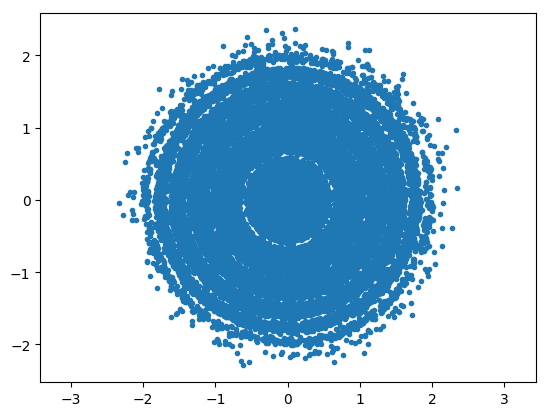

(-2.566212936786639, 2.5819691625700356, -2.523572514050853, 2.59150678564527)

In [125]:
plot(x[1,1:10:end],x[2,1:10:end],".")
axis("equal")

The 2D histogram approximating the underlying probability distribution function

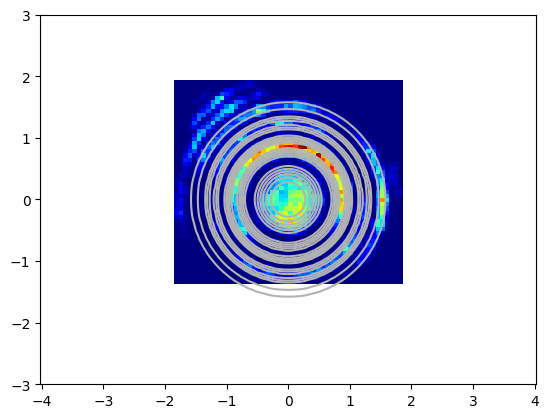

(-3.0, 3.0, -3.0, 3.0)

In [130]:
hist2d(x,y,N=50) = PyPlot.plt[:hist2d](x,y,N)

hist2d(x[1,1:10:end],x[2,1:10:end],50)
contour(Fx,Fy,F'; colors = [[0.7,0.7,0.7]])
axis("equal")

Try any other function, however note that it must be postive for all $\vec x$.

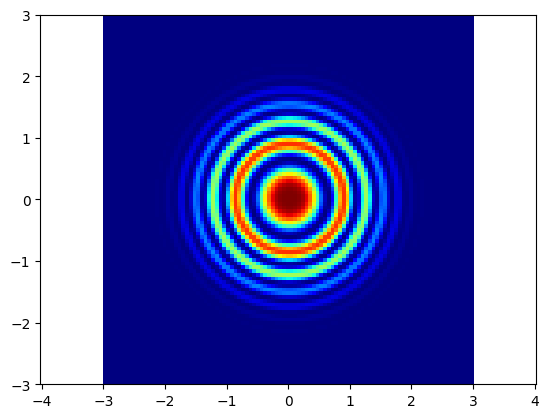

(-3.0:0.06060606060606061:3.0, -3.0:0.06060606060606061:3.0, [6.21191e-36 2.57838e-36 … 2.57838e-36 6.21191e-36; 2.57838e-36 3.80017e-33 … 3.80017e-33 2.57838e-36; … ; 2.57838e-36 3.80017e-33 … 3.80017e-33 2.57838e-36; 6.21191e-36 2.57838e-36 … 2.57838e-36 6.21191e-36])

In [121]:
function f2(x)
    r = x'*x
    return exp(-r^2/4) * (cos(4*r))^2
end

Fx,Fy,F = plotF(f2)

In [117]:
size(Fx)

(100,)

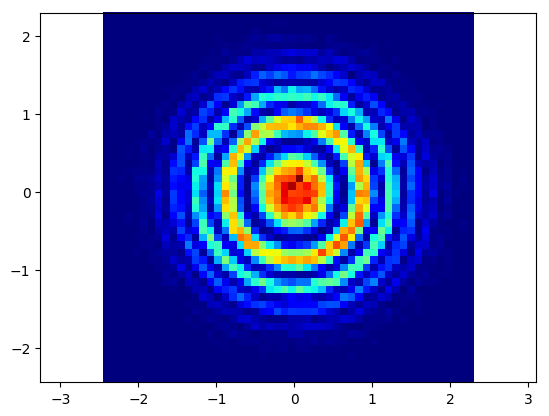

(-2.455785216344829, 2.299634880415049, -2.445260931363054, 2.2945529591116807)

In [131]:
x = metropolis_algorithm(n,niter,nextx,f2)
hist2d(x[1,1:10:end],x[2,1:10:end])
axis("equal")


Too small and too large-steps in $g(\vec x|\vec y) lead to a degradation

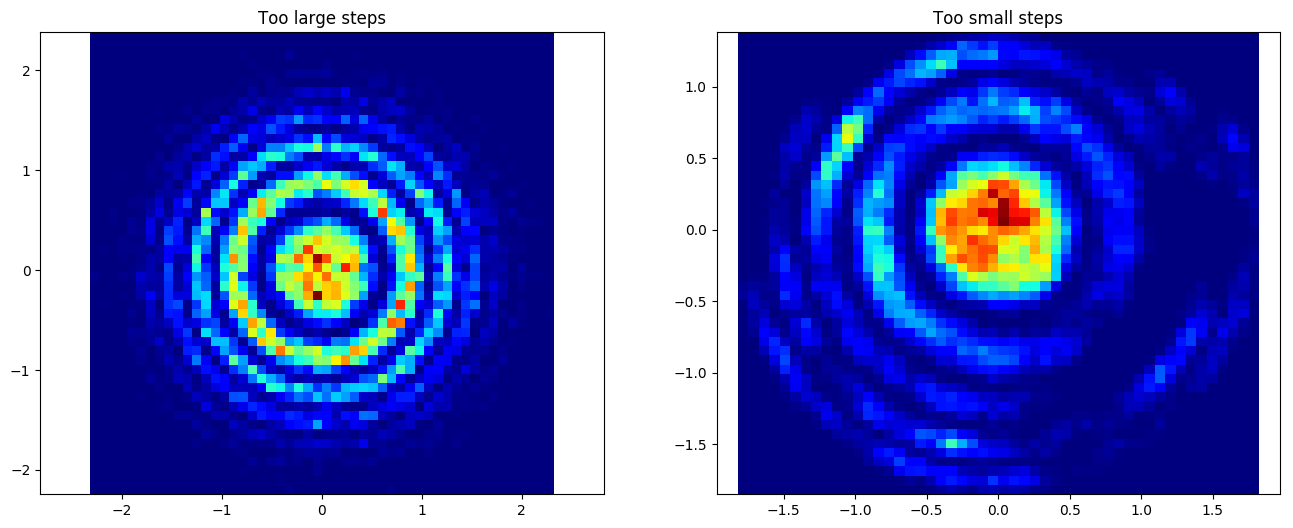

PyObject Text(0.5,1,u'Too small steps')

In [137]:
figure(figsize=(16,6))
subplot(1,2,1)
nextx_large_steps(x) = x + 5*randn(size(x))
x = metropolis_algorithm(n,niter,nextx_large_steps,f2)
hist2d(x[1,1:10:end],x[2,1:10:end])
axis("equal")
title("Too large steps")

subplot(1,2,2)
nextx_small_steps(x) = x + 0.01*randn(size(x))
x = metropolis_algorithm(n,niter,nextx_small_steps,f2)
hist2d(x[1,1:10:end],x[2,1:10:end])
axis("equal")
title("Too small steps")
